# Predicting Personal Loan Acceptance with Random Forest Classifier

**About Dataset:**
The dataset utilized in this project contains various features related to individuals' demographics, financial status, and banking behaviors, including ID, age, experience, income, ZIP code, family size, average credit card spending (CCAvg), education level, mortgage status, and indicators for personal loan acceptance, securities account ownership, CD account ownership, online banking, and credit card ownership.

**Objective:**
The primary objective of this project is to develop an accurate predictive model using the random forest classifier to determine the likelihood of personal loan acceptance. By analyzing the features provided in the personal loan dataset, the project aims to identify key factors influencing loan acceptance and build a reliable model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
d=pd.read_csv(r"C:\Users\admin\Downloads\Bank_Personal_Loan_Data.csv")
d

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
d.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [4]:
d.drop(["ID","ZIP Code"],axis=1,inplace=True)

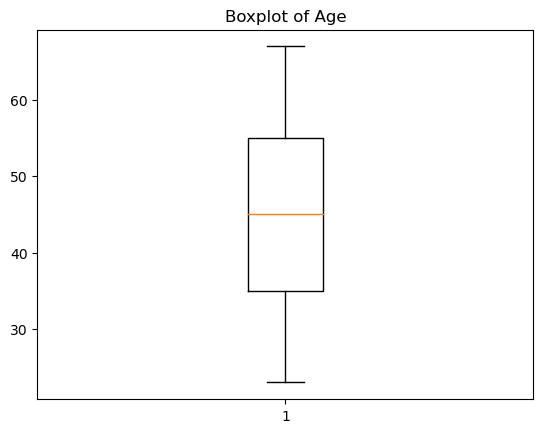

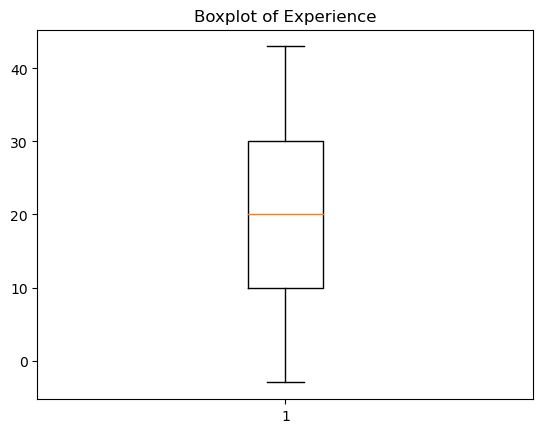

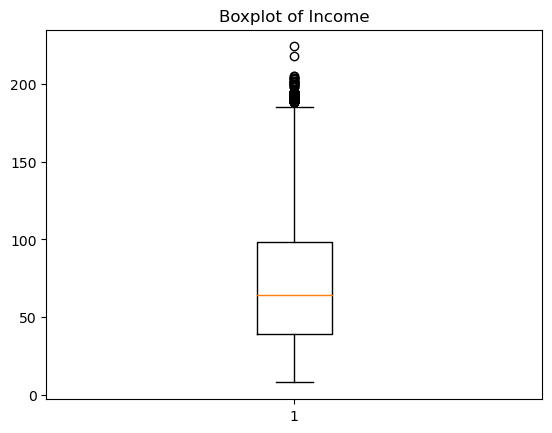

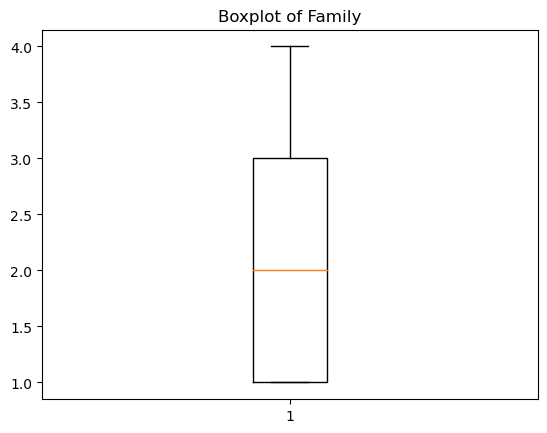

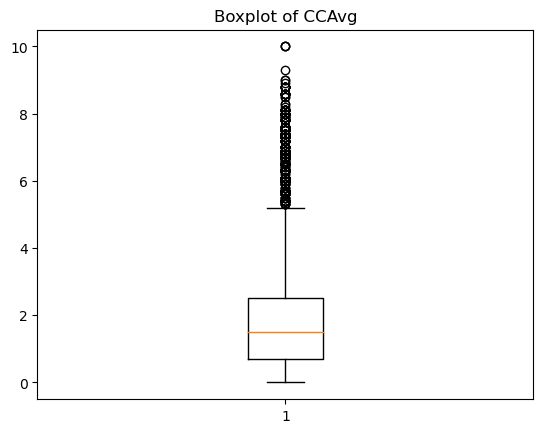

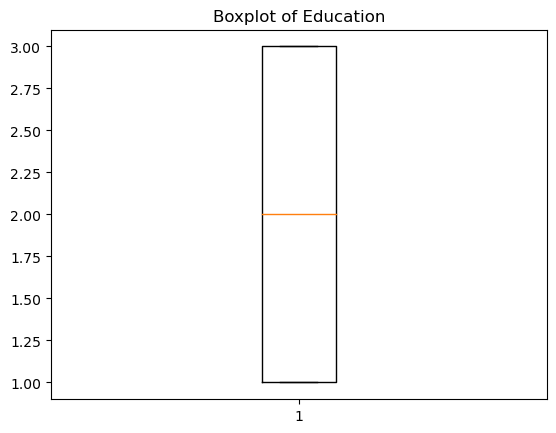

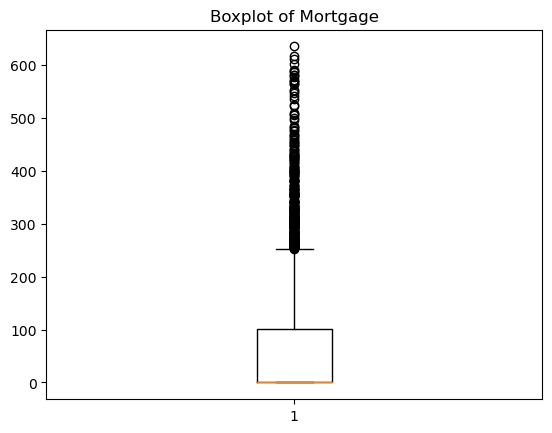

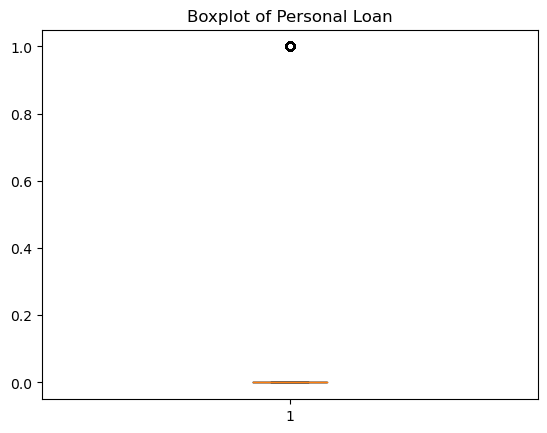

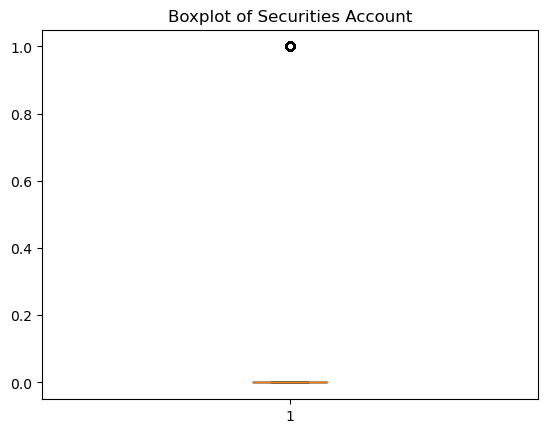

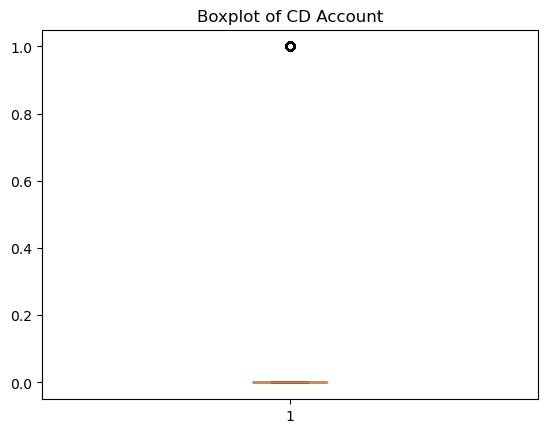

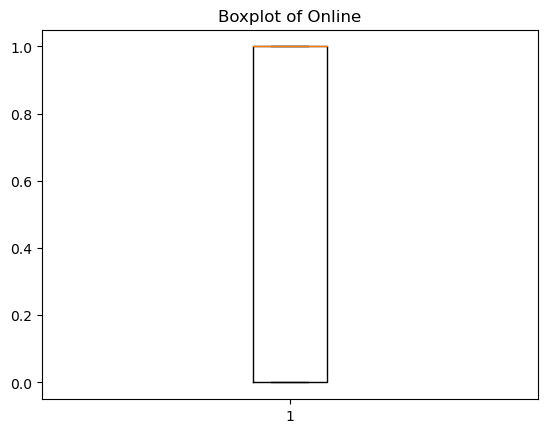

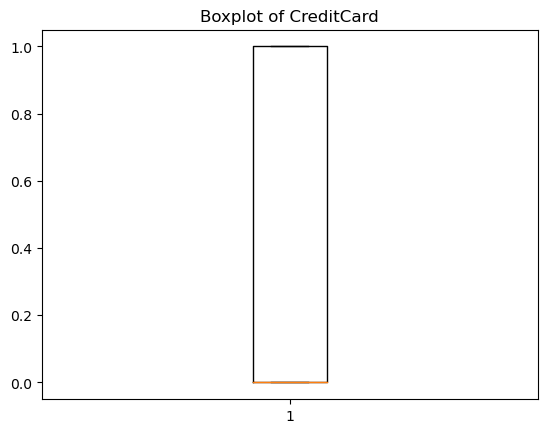

In [5]:
numerical_columns = d.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    plt.boxplot(d[column])
    plt.title("Boxplot of "+column)
    plt.show()

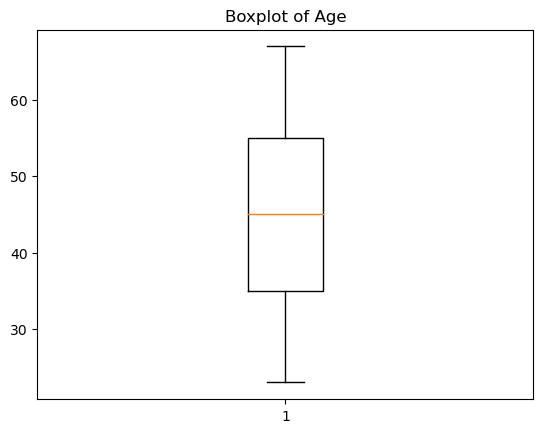

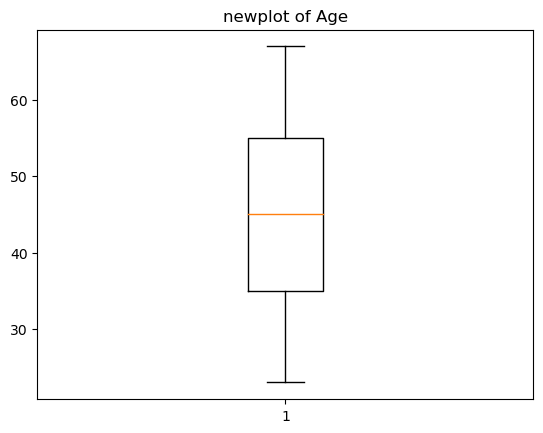

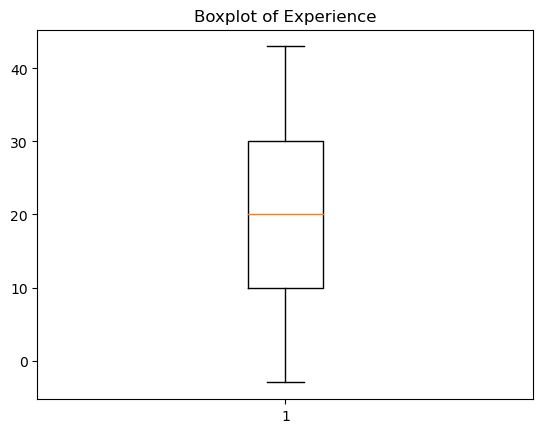

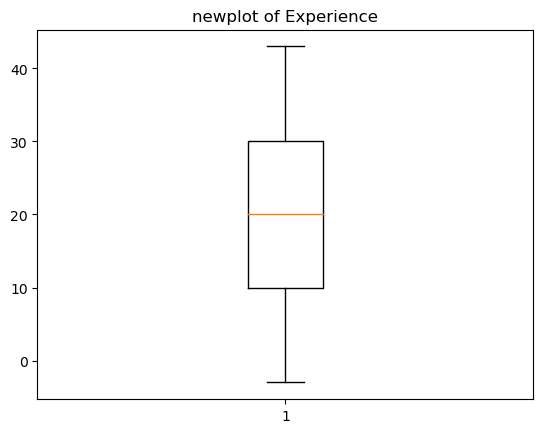

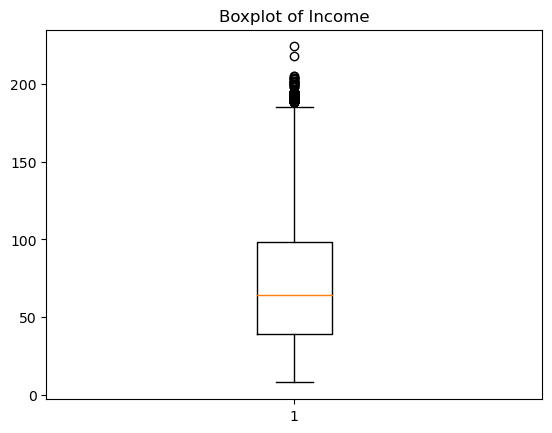

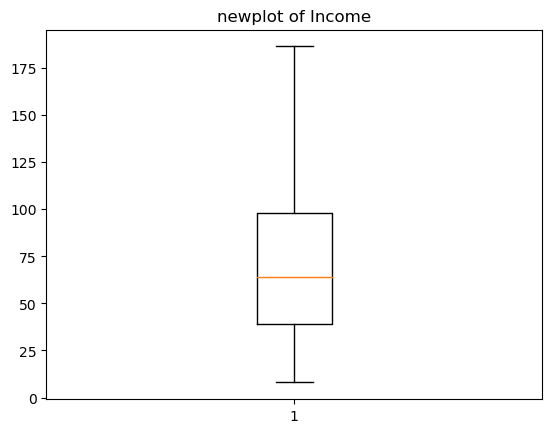

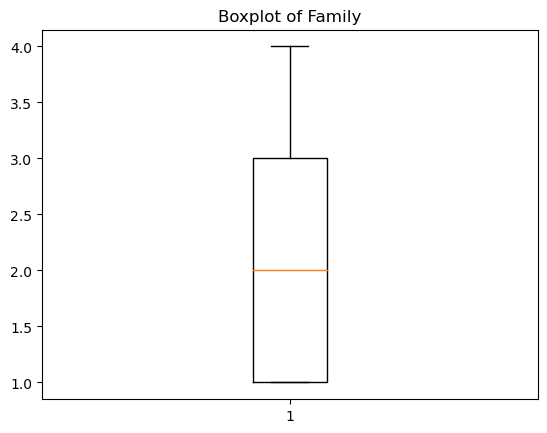

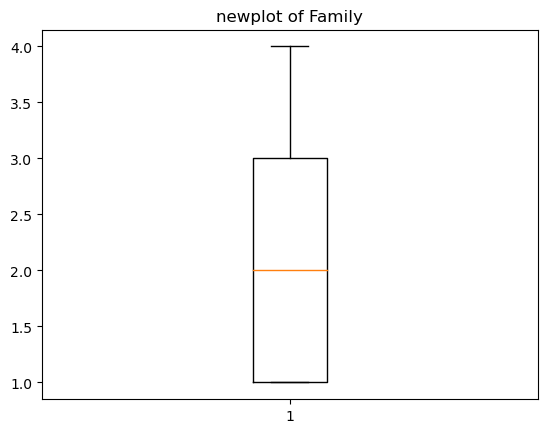

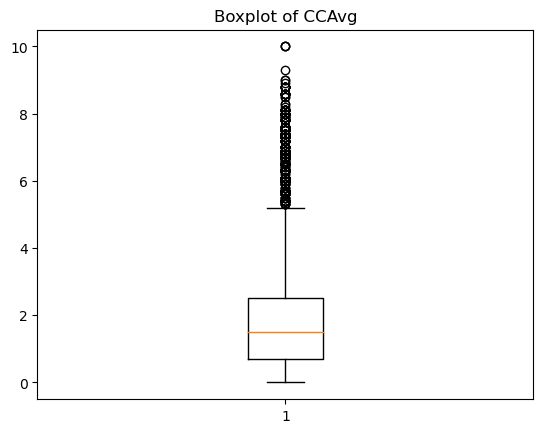

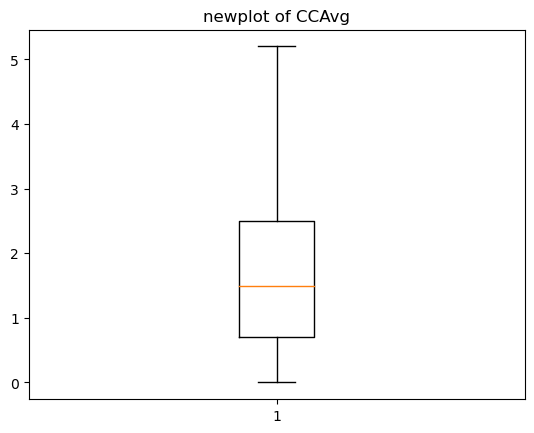

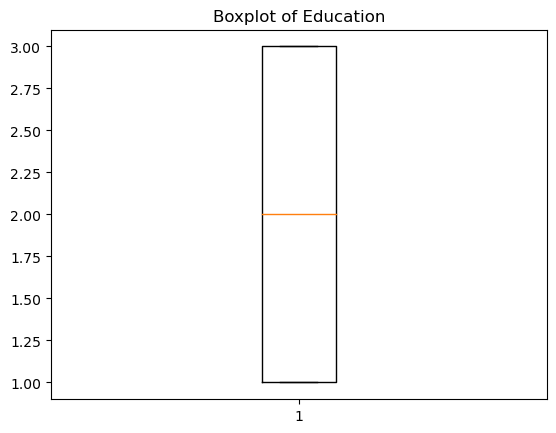

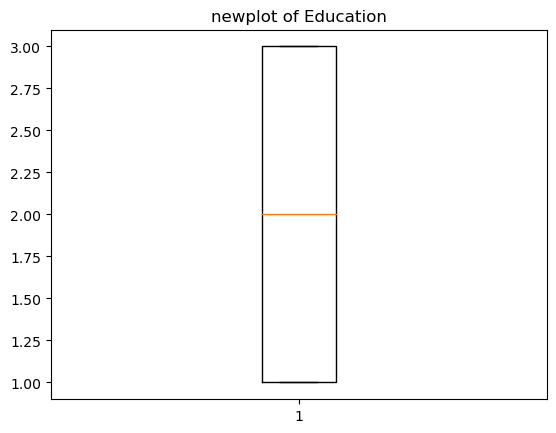

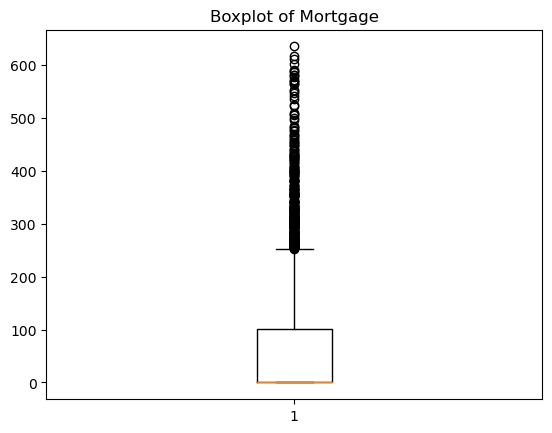

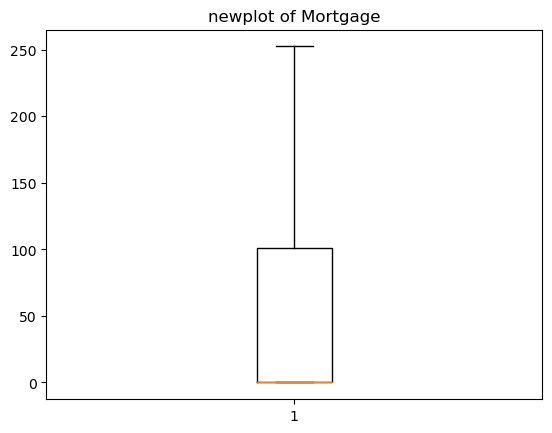

In [6]:
#Detecting & replacing outliers by lower and upper limit
columns_to_exclude = ['Personal Loan', 'Securities Account','CD Account','Online','CreditCard']

numerical_columns = d.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    if column in columns_to_exclude:
        continue
    plt.boxplot(d[column])
    plt.title("Boxplot of "+column)
    plt.show()
    IQR = d[column].quantile(0.75) - d[column].quantile(0.25)
    lower_limit = d[column].quantile(0.25) - (1.5 * IQR)
    upper_limit = d[column].quantile(0.75) + (1.5 * IQR)
    d[column] = np.clip(d[column], lower_limit, upper_limit) 
    plt.boxplot(d[column])
    plt.title("newplot of "+column)
    plt.show()

In [7]:
d

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49.0,4,1.6,1,0.0,0,1,0,0,0
1,45,19,34.0,3,1.5,1,0.0,0,1,0,0,0
2,39,15,11.0,1,1.0,1,0.0,0,0,0,0,0
3,35,9,100.0,1,2.7,2,0.0,0,0,0,0,0
4,35,8,45.0,4,1.0,2,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40.0,1,1.9,3,0.0,0,0,0,1,0
4996,30,4,15.0,4,0.4,1,85.0,0,0,0,1,0
4997,63,39,24.0,2,0.3,3,0.0,0,0,0,0,0
4998,65,40,49.0,3,0.5,2,0.0,0,0,0,1,0


## Random Forest

In [8]:
# select features
y= d['Personal Loan']
X = d.loc[:,d.columns!='Personal Loan']

In [9]:
X

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49.0,4,1.6,1,0.0,1,0,0,0
1,45,19,34.0,3,1.5,1,0.0,1,0,0,0
2,39,15,11.0,1,1.0,1,0.0,0,0,0,0
3,35,9,100.0,1,2.7,2,0.0,0,0,0,0
4,35,8,45.0,4,1.0,2,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40.0,1,1.9,3,0.0,0,0,1,0
4996,30,4,15.0,4,0.4,1,85.0,0,0,1,0
4997,63,39,24.0,2,0.3,3,0.0,0,0,0,0
4998,65,40,49.0,3,0.5,2,0.0,0,0,1,0


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=70)


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [12]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15, None],  # None means unlimited depth
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 0.5],  # Adjusted max_features
    'bootstrap': [True, False]
}

In [13]:
#create an instance of RandomForestClassifier
clf=RandomForestClassifier(random_state=96)


In [14]:
# # Create an instance of GridSearchCV
# grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='precision', cv=5, n_jobs=-1)


In [15]:
#create an instance of RandomizedSearchCV
random_search=RandomizedSearchCV(estimator=clf,param_distributions=param_grid)

In [16]:
#fit the RandomizedSearchCV instance to the training data
random_search.fit(X_train, y_train)


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\admin\anaconda3\Lib\site-packages\

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=96),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, None],
                                        'max_features': ['auto', 'sqrt', 0.5],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 150, 200]})

In [17]:
# # Fit the GridSearchCV instance to the training data
# grid_search.fit(X_train, y_train)

In [18]:
#best parameters found
print("Best parameters found:",random_search.best_params_)

Best parameters found: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 10, 'bootstrap': True}


In [19]:
# print("Best parameters found:", grid_search.best_params_)

In [20]:
# # Use the best estimator found by GridSearchCV
# best_clf = grid_search.best_estimator_

In [21]:
 from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

In [22]:
#use the best estimator found by randomizedSearchCV
best_clf=random_search.best_estimator_

In [23]:
#make predictions on the training and test data 
train_predictions=best_clf.predict(X_train)
test_predictions=best_clf.predict(X_test)

In [24]:
#calculate accuracy on training and test data
train_accuracy=accuracy_score(y_train,train_predictions)
test_accuracy=accuracy_score(y_test,test_predictions)


In [25]:
print("Train Accuracy:",train_accuracy)
print("Test Accuracy:",test_accuracy)

Train Accuracy: 0.998
Test Accuracy: 0.988


Both the training and test accuracies are very high, indicating that the model performs well in terms of overall correctness in predicting the classes.

In [26]:
train_precision = precision_score(y_train, train_predictions)
test_precision = precision_score(y_test, test_predictions)

In [27]:
print("Train Precision:", train_precision)
print("Test Precision:", test_precision)

Train Precision: 1.0
Test Precision: 0.9847328244274809


Precision measures the proportion of true positive predictions among all positive predictions. Both training and test precisions are high, suggesting that the model has a low false positive rate.

In [28]:
train_recall = recall_score(y_train, train_predictions)
test_recall = recall_score(y_test, test_predictions)
 

In [29]:
print("Train Recall:", train_recall)
print("Test Recall:", test_recall)

Train Recall: 0.9791044776119403
Test Recall: 0.8896551724137931


Recall measures the proportion of true positive predictions among all actual positives. While the training recall is high, indicating that the model captures most of the positive instances in the training data, the test recall is lower, suggesting that the model may miss some positive instances in the test data.

In [30]:
train_f1 = f1_score(y_train, train_predictions)
test_f1 = f1_score(y_test, test_predictions)
 

In [31]:
print("Train f1:", train_f1)
print("Test f1:", test_f1)

Train f1: 0.9894419306184012
Test f1: 0.9347826086956521


The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. Both training and test F1-scores are relatively high, indicating good overall performance of the model.

In [32]:
train_roc_auc_score = roc_auc_score(y_train, train_predictions)
test_roc_auc_score = roc_auc_score(y_test, test_predictions)

In [33]:
print("Train roc score:", train_roc_auc_score)
print("Test roc score:", test_roc_auc_score)

Train roc score: 0.9895522388059701
Test roc score: 0.9440895788268228


ROC AUC (Receiver Operating Characteristic Area Under the Curve) measures the area under the ROC curve, which evaluates the model's ability to distinguish between the classes. Both training and test ROC AUC scores are high, indicating good discrimination between the classes.

**Conclusion:**

The model performs exceptionally well on the training data, achieving high accuracy, precision, recall, F1-score, and ROC AUC score.
The performance on the test data is slightly lower than on the training data, but still very good overall.
There is a notable drop in test recall compared to the training recall, indicating that the model may struggle to capture all positive instances in the test data.

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
test_confusion_matrix = confusion_matrix(y_test, test_predictions)
test_confusion_matrix

array([[1353,    2],
       [  16,  129]], dtype=int64)

In [45]:
print("Train Accuracy:",train_accuracy)
print("Test Accuracy:",test_accuracy)
print("Train Precision:", train_precision)
print("Test Precision:", test_precision)
print("Train Recall:", train_recall)
print("Test Recall:", test_recall)
print("Train f1:", train_f1)
print("Test f1:", test_f1)
print("Train roc score:", train_roc_auc_score)
print("Test roc score:", test_roc_auc_score)


Train Accuracy: 0.998
Test Accuracy: 0.988
Train Precision: 1.0
Test Precision: 0.9770992366412213
Train Recall: 0.9791044776119403
Test Recall: 0.8896551724137931
Train f1: 0.9894419306184012
Test f1: 0.9347826086956521
Train roc score: 0.9895522388059701
Test roc score: 0.9440895788268228
